In [1]:
import networkx as nx
import pandas as pd

In [6]:
nx.__version__

'2.5'

# Introduction to networks

Let's construct an undirected network by hand.

In [2]:
G = nx.Graph()

Adding nodes:

In [3]:
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_nodes_from([5, 6, 7, 8, 9, 10, 11])

In [9]:
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)
G.add_edge(2, 3)
G.add_edge(2, 4)
G.add_edge(3, 4)

nx.add_path(G, [4, 5, 6, 7, 8])

nx.add_cycle(G, [8, 9, 10, 11])
G.add_edges_from([(8, 10), (9, 11)])

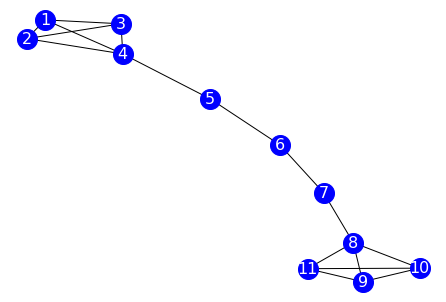

In [20]:
nx.draw(G,
        with_labels=True,
        node_color='blue',
        node_size=400,
        font_color='white',
        font_size=16,
       )

In [36]:
nx.adjacency_matrix(G)

<11x11 sparse matrix of type '<class 'numpy.int64'>'
	with 32 stored elements in Compressed Sparse Row format>

In [42]:
nx.adjacency_matrix(G).todense()

matrix([[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]])

In [21]:
G.number_of_nodes()

11

In [22]:
G.number_of_edges()

16

In [23]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))

In [24]:
list(G.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [25]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (8, 11), (8, 10), (9, 10), (9, 11), (10, 11)])

In [26]:
list(G.edges())

[(1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (8, 11),
 (8, 10),
 (9, 10),
 (9, 11),
 (10, 11)]

Get the neighbor of a node:

In [27]:
G.neighbors(4)

In [28]:
list(G.neighbors(4))

[1, 2, 3, 5]

Another way to get the neighbor:

In [29]:
G[4]

AtlasView({1: {}, 2: {}, 3: {}, 5: {}})

In [30]:
list(G[4])

[1, 2, 3, 5]

What's the degree of a node?

In [33]:
len(G[4])

4

In [32]:
G.degree(4)

4

Get the degrees of all nodes:

In [34]:
G.degree()

DegreeView({1: 3, 2: 3, 3: 3, 4: 4, 5: 2, 6: 2, 7: 2, 8: 4, 9: 3, 10: 3, 11: 3})

In [35]:
dict(G.degree())

{1: 3, 2: 3, 3: 3, 4: 4, 5: 2, 6: 2, 7: 2, 8: 4, 9: 3, 10: 3, 11: 3}

Degree distribution:

In [38]:
node_degree = pd.Series(dict(G.degree()), name='degree')
node_degree

1     3
2     3
3     3
4     4
5     2
6     2
7     2
8     4
9     3
10    3
11    3
Name: degree, dtype: int64

In [39]:
node_degree.value_counts()

3    6
2    3
4    2
Name: degree, dtype: int64

In [40]:
node_degree.value_counts(normalize=True).sort_index()

2    0.272727
3    0.545455
4    0.181818
Name: degree, dtype: float64

<AxesSubplot:xlabel='degree', ylabel='probability'>

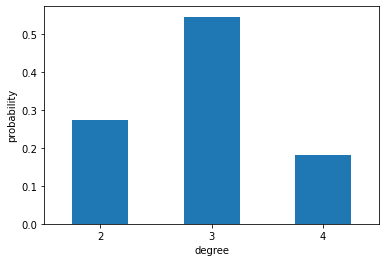

In [41]:
node_degree.value_counts(normalize=True).sort_index().plot.bar(xlabel='degree', ylabel='probability', rot=0)

## Weighted network